In [427]:
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
from studies.utils import *

Define Parameters

In [428]:
problem = 'infinite_slab'
case = 1
study = 6

Parse the Data

In [429]:
print("Loading and formating the data...")
t_start = time.time()
if problem == 'infinite_slab':
    dataset = get_data(problem, case, study)
else:
    dataset = get_data(problem, study)
t_end = time.time()
print(f"Loading the data took {t_end - t_start:3f} s")

Loading and formating the data...
Loading the data took 6.882786 s


Plot Stuff

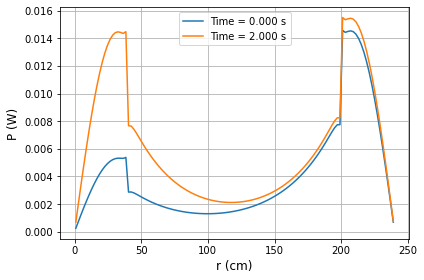

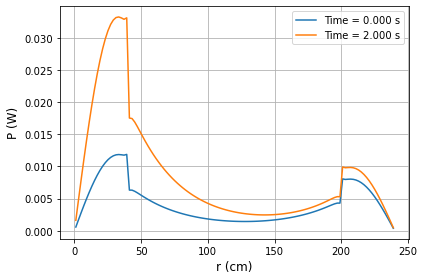

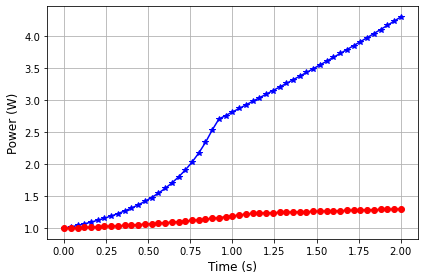

In [430]:
def plot_power_span():
    plt.figure()
    plt.xlabel("Time (s)", fontsize=12)
    plt.ylabel("Power (W)", fontsize=12)

    final_power = []
    for s in range(len(dataset.simulations)):
        simulation = dataset.simulations[s]
        p_f = simulation.powers[-1]
        final_power.append(p_f)

    styles = ['-*b', '-or']
    argmin = int(np.argmin(final_power))
    argmax = int(np.argmax(final_power))
    for i, s in enumerate([argmax, argmin]):
        simulation = dataset.simulations[s]
        powers = dataset.simulations[s].powers
        plt.plot(dataset.times, powers, styles[i])
    plt.grid(True)
    plt.tight_layout()

def plot_power_densities():
    for s in [0, -1]:
        simulation = dataset.simulations[s]
        simulation.plot_power_densities([0.0, dataset.times[-1]])

if problem == 'three_group_sphere':
    plot_power_span()

    ax = plt.gca()
    lines = ax.get_lines()
    r_b = dataset.parameters[[0, -1], 0]
    for l, line in enumerate(lines):
        line.set_label(f"{r_b[l]:.5f} cm")
    ax.set_xlabel("Time ($\mu$s)", fontsize=12)
    ax.legend()

elif problem == 'infinite_slab':
    plot_power_densities()
    plot_power_span()

elif problem == 'twigl':
    plot_power_span()